# Agglomerative Clustering

Otro enfoque no supervisado comúnmente utilizado para agrupar datos son los dendrogramas. Los dendrogramas se crean a partir de un algoritmo jerárquico simple, lo que permite **visualizar** de manera eficiente si los datos están agrupados sin ningún etiquetado ni supervisión.

Los métodos de agrupación jerárquica se generan desde un enfoque de arriba hacia abajo (_top-down_) o de abajo hacia arriba (_bottom-up_). En concreto, son de dos tipos:

- **Aglomerativo**. Cada punto de datos $x_j$ es inicialmente su propio grupo. Los datos se combinan en pares a medida que se crea una jerarquía de grupos. La combinación de datos finalmente se detiene una vez que todos los datos se han combinado en un único súper clúster. Este es el enfoque ascendente en la agrupación jerárquica.

- **Divisivo**. En este caso, todas las observaciones $x_j$ son inicialmente parte de un único cúmulo gigante. Luego, los datos se dividen de forma recursiva en grupos cada vez más pequeños. La división continúa hasta que el algoritmo se detiene según un objetivo especificado por el usuario. El método de división puede dividir los datos hasta que cada punto de datos sea su propio nodo.

La construcción del **dendrograma** procede de una estructura algorítmica simple basada en el cálculo de la distancia entre puntos de datos. Aunque normalmente usamos una distancia euclidiana, hay una serie de métricas de distancia importantes que se pueden considerar para diferentes tipos de datos. A continuación se indican algunas distancias típicas:

1. Euclidean distance $\left \| x_j - x_k \right \|_2$
2. Squared Euclidean distance $\left \| x_j - x_k \right \|_2^2$
3. Manhattan distance $\left \| x_j - x_k \right \|_1$
4. Mahalanobis distance $\sqrt{(x_j-x_k)^{T}C^{-1}(x_j-x_k))}$, donde $C^{-1}$ es la matriz de covarianza. Esta describe las relaciones lineales entre múltiples variables. Al utilizar la matriz de covarianza, la distancia de Mahalanobis puede detectar patrones y anomalías de manera más efectiva que la distancia euclidiana, ya que tiene en cuenta las correlaciones entre las variables.

## Algoritmo

El algoritmo del dendrograma se muestra en la siguiente figura:

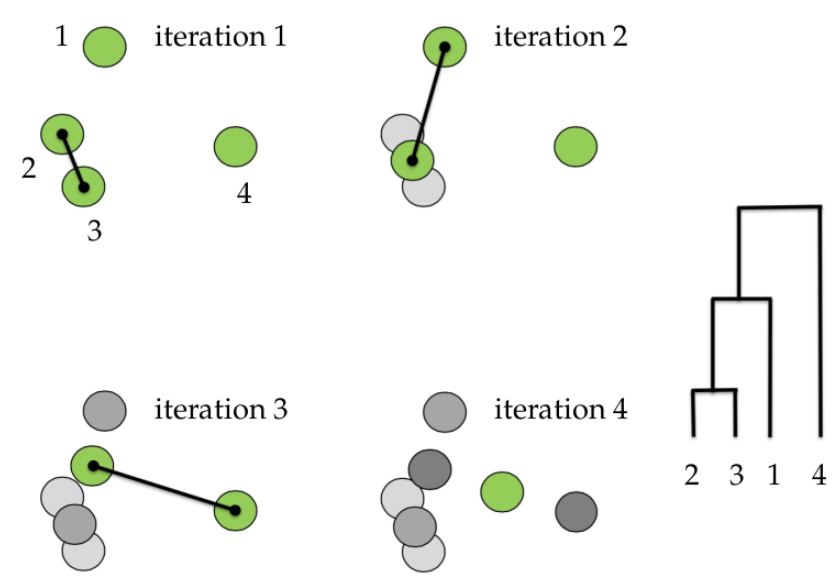

El algoritmo es el siguiente:

1. Calcule la distancia entre todos los $m$ puntos de datos $x_j$ (la figura considera el uso de una distancia euclidiana).
2. Fusionar los dos puntos de datos más cercanos en un único punto de datos nuevo a medio camino entre sus ubicaciones originales.
3. Repita el cálculo con los restantes $m − 1$ puntos.

El algoritmo continúa hasta que los datos se fusionan jerárquicamente en un único punto de datos.

### Consideraciones

Al comienzo del proceso de aglomeración, encontrar puntos de datos similares es sencillo, ya que estamos comparando puntos de datos individuales. Sin embargo, una vez que tenemos más de una instancia por clúster, debemos definir qué entendemos por **similitud** entre grupos o clústeres. Dados dos clústeres $F$ y $G$, tenemos algunas opciones:

- Enlace simple (_Single linkage_): Definimos la similitud por el par de instancias más cercano: $d_{SL} (F, G) = \min d(x_i , x_j)$ con $x_i \in F$ y $x_j \in G$
- Enlace completo (_Complete linkage_): La similitud viene dada por el par más lejano: $d_{CL} ( F, G ) = \max d( x_i , x_j )$ con $x_i \in F$ y $x_j \in G$.
- Promedio del grupo (_Group average_): La similitud viene dada por la similitud media entre $F$ y $G$:

$$d_{GA} ( F, G ) = \frac{1}{\left \| F \right \| \left \| G \right \|} \sum_i\sum_j d( x_i , x_j )$$ con $$x_i \in F$$ y $$x_j \in G$$


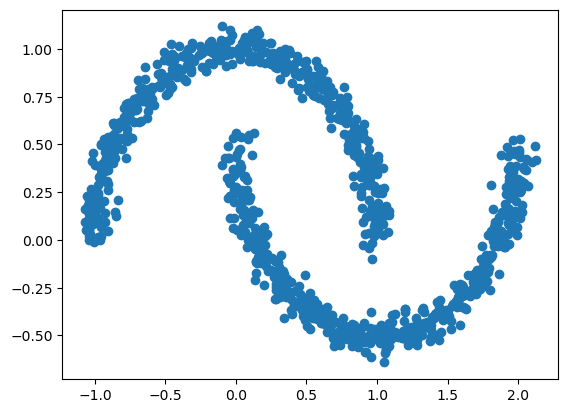

In [86]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

X, y = make_moons(n_samples=1000, noise=0.05)
plt.scatter(X[:, 0], X[:, 1])

## DBSCAN


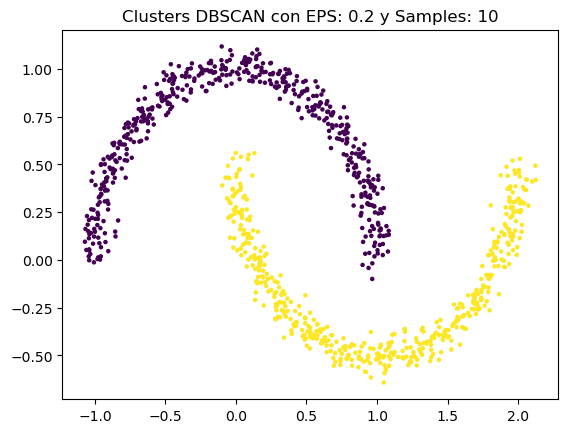

Silhouette Score: 0.33378807499781316


In [87]:
# epsilon y número de puntos para considerar core-point

eps = 0.2
min_s = 10
# Crear y ajustar el modelo DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_s)
labels = dbscan.fit_predict(X)

# Visualizar los clusters generados por DBSCAN
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="viridis", s=5)
plt.title(f"Clusters DBSCAN con EPS: {eps} y Samples: {min_s}")
plt.show()

# Evaluar el modelo con Silhouette Score (si hay más de un cluster)
if len(set(labels)) > 1 and -1 not in set(labels):  # Excluir ruido (-1)
    score = silhouette_score(X, labels)
    print(f"Silhouette Score: {score}")
else:
    print(
        "No se puede calcular el Silhouette Score"
    )

# Agglomerative Clustering


In [88]:
# Solo permite aplicarlo pero no visualizar dendogramas
from sklearn.cluster import AgglomerativeClustering

# Para visualizar dendogramas
import scipy.cluster.hierarchy as shc

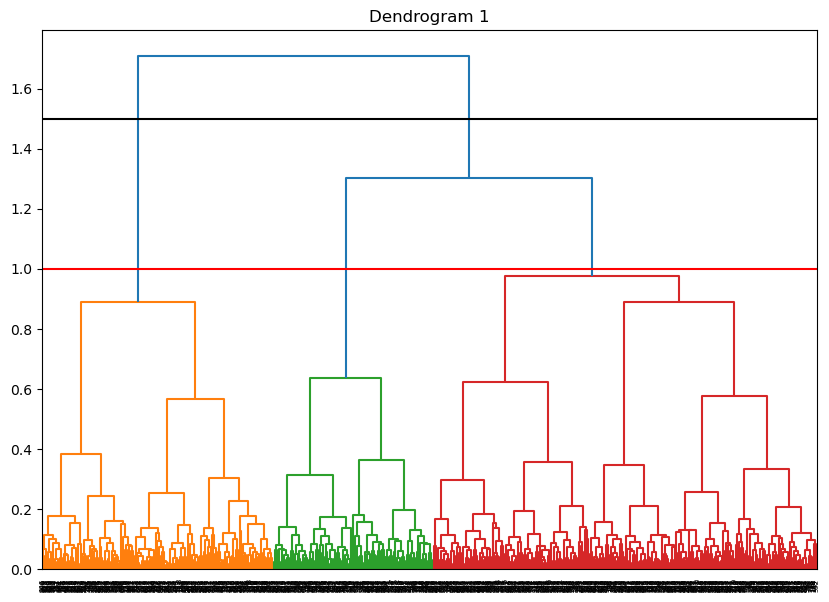

In [89]:
# plot
plt.figure(figsize=(10, 7))
plt.title("Dendrogram 1")
shc.dendrogram(shc.linkage(X, method='average'))
plt.axhline(1.0, color='r')
plt.axhline(1.5, color='k')
plt.show()

In [90]:
# Modelo de Clustering

agg_clustering = AgglomerativeClustering(distance_threshold=1.0, n_clusters=None, metric='euclidean', linkage='average')
agg_labels = agg_clustering.fit_predict(X)

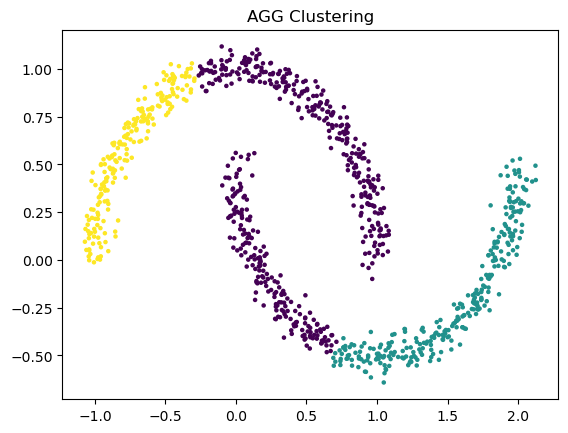

In [95]:

plt.scatter(X[:, 0], X[:, 1], c=agg_labels, cmap="viridis", s=5)
plt.title("AGG Clustering")
plt.show()


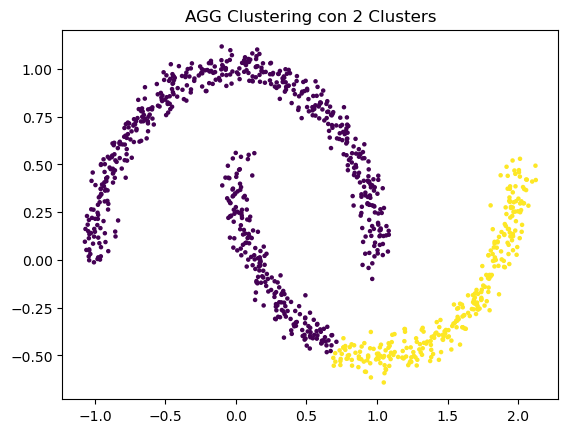

In [ ]:

agg_clustering2 = AgglomerativeClustering(linkage='average', metric='euclidean', distance_threshold=1.5, n_clusters=None)
agg_labels2 = agg_clustering2.fit_predict(X)


plt.scatter(X[:, 0], X[:, 1], c=agg_labels2, cmap="viridis", s=5)
plt.title("AGG Clustering con 2 Clusters")
plt.show()